## Importing necessary libraries for Data Analysis/ Preprocessing "Cleaning"


In [1]:
# Data Analysis/ Preprocessing
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning and Evaluation

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
import xgboost as xgb

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,classification_report
from sklearn.metrics import confusion_matrix

import warnings # used to remove any warning message that might come up
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv(r'diabetic_data.csv')
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


### DROPPING AND RENAMING COLUMNS

In [3]:
df.rename(columns = {'patient_nbr': 'patient_id'},inplace = True)
df

,encounter_id,patient_id,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


## CHECKING THE SHAPE OF THE DATASET(NUMBER OF ROWS AND COLUMNS)

In [4]:
df.shape

(101766, 50)

## CHECKING THE INFORMATION OF THE DATASET
### This shows a detailed information of the dataset. That is, the data type of each column,the number of rows and columns, the the number of missing entries,the name of the columns etc.
### It can be seen that the 'max_glu_serum' and 'A1Cresult' columns have 96420 and 84748 entries missing respectively.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_id                101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

## Expanding the columns display in the dataframe.

In [6]:
pd.set_option("display.max_columns",None)

In [7]:
df

,encounter_id,patient_id,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,NaN,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,NaN,NaN,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,NaN,NaN,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


## Checking for Missing Values/NAN values in the dataframe.
### This shows the number of empty cells  for each column in the dataframe, which are 'max_glu_serum ' and 'A1Cresult ' columns.

In [8]:
df.isnull().sum()

encounter_id                    0
patient_id                      0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [9]:
df['payer_code'].unique()

array(['?', 'MC', 'MD', 'HM', 'UN', 'BC', 'SP', 'CP', 'SI', 'DM', 'CM',
       'CH', 'PO', 'WC', 'OT', 'OG', 'MP', 'FR'], dtype=object)

### Delving deeper into the 'payer_code' column using the unique syntax, it was discovered that some rows had '?' instead of useful values.

## Replacing "?" with NAN

In [10]:
df.replace("?",np.nan,inplace = True)

In [11]:
df

,encounter_id,patient_id,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,51,0,16,0,0,0,250.13,291,458,9,NaN,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,33,3,18,0,0,1,560,276,787,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,53,0,9,1,0,0,38,590,296,13,NaN,NaN,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,NaN,NaN,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


### Here all entries of "?" in the dataframe are been replaced with NAN values.

## Checking for Missing values

In [12]:
df.isnull().sum()

encounter_id                    0
patient_id                      0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

### After replacing "?" with NAN values, the dataframe is been checked again for missing values. In doing so, it was discovered that more cloumns that didn't show/have missing values previously now have.
### Example 'race ','weight','payer_code',etc have missing values of 2273,98569,and 40256 respectively, etc.

In [13]:
round(df.isnull().sum()/len(df)*100,2)

encounter_id                 0.00
patient_id                   0.00
race                         2.23
gender                       0.00
age                          0.00
weight                      96.86
admission_type_id            0.00
discharge_disposition_id     0.00
admission_source_id          0.00
time_in_hospital             0.00
payer_code                  39.56
medical_specialty           49.08
num_lab_procedures           0.00
num_procedures               0.00
num_medications              0.00
number_outpatient            0.00
number_emergency             0.00
number_inpatient             0.00
diag_1                       0.02
diag_2                       0.35
diag_3                       1.40
number_diagnoses             0.00
max_glu_serum               94.75
A1Cresult                   83.28
metformin                    0.00
repaglinide                  0.00
nateglinide                  0.00
chlorpropamide               0.00
glimepiride                  0.00
acetohexamide 

### Handling the missing values in the dataset
Looking at the dataset,some features such as weight, max_glu_serum and A1cresult have a large portion(more than half of the information) of the data missing. It will be unwise to fill with either mean,median or mode as this can create bias, therefore these columns will be dropped.

The other missing values will be filled with their mode as modes are not affected by outliers.

In [14]:
df.drop(columns = ['weight', 'max_glu_serum', 'A1Cresult'],inplace = True,axis = 1)

In [15]:
df.dropna(subset=['race','diag_1','diag_2','diag_3' ],inplace = True,axis = 0)

In [16]:
#df['race'] = df['race'].fillna(df['race'].mode()[0])
df['payer_code'] = df['payer_code'].fillna(df['payer_code'].mode()[0])
df['medical_specialty'] = df['medical_specialty'].fillna(df['medical_specialty'].mode()[0])
# df['diag_1'] = df['diag_1'].fillna(df['diag_1'].mode()[0])
# df['diag_2'] = df['diag_2'].fillna(df['diag_2'].mode()[0])
# df['diag_3'] = df['diag_3'].fillna(df['diag_3'].mode()[0])

In [17]:
# Resetting index to the current rows

df.reset_index(drop = True, inplace = True)

In [18]:
df

,encounter_id,patient_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,MC,InternalMedicine,59,0,18,0,0,0,276,250.01,255,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
1,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,MC,InternalMedicine,11,5,13,2,0,1,648,250,V27,6,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
2,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,MC,InternalMedicine,44,1,16,0,0,0,8,250.43,403,7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
3,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,MC,InternalMedicine,51,0,8,0,0,0,197,157,250,5,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,MC,InternalMedicine,31,6,16,0,0,0,414,411,250,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98048,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,MC,InternalMedicine,51,0,16,0,0,0,250.13,291,458,9,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
98049,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,MC,InternalMedicine,33,3,18,0,0,1,560,276,787,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
98050,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,MC,InternalMedicine,53,0,9,1,0,0,38,590,296,13,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
98051,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [19]:
# Using the IDS_mapping csv

discharged_id_mapped = {1:"Discharged to Home",
                    6:"Discharged to Home",
                    8:"Discharged to Home",
                    13:"Discharged to Home",
                    19:"Discharged to Home",
                    18:np.nan,25:np.nan,26:np.nan,
                    2:"Transferred",3:"Transferred",4:"Transferred",
                    5:"Transferred",7:"Transferred",9:"Transferred",
                    10:"Transferred",11:"Transferred",12:"Transferred",
                    14:"Transferred",15:"Transferred",16:"Transferred",
                    17:"Transferred",20:"Transferred",21:"Transferred",
                    22:"Transferred",23:"Transferred",24:"Transferred",
                    27:"Transferred",28:"Transferred",29:"Transferred",30:"Transferred"}

df["discharge_disposition_id"] = df["discharge_disposition_id"].replace(discharged_id_mapped)

## Checking for Duplicates in the Dataframe. 

In [20]:
df.duplicated().sum()

0

### Duplicates can skew the analysis, leading to misleading results. It can be observed that there are no duplicates in the dataframe.

## Statistical Analysis

In [21]:
df.describe()

,encounter_id,patient_id,admission_type_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,9.805300e+04,9.805300e+04,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000
mean,1.658294e+08,5.484792e+07,2.025813,5.776692,4.421976,43.148073,1.350749,16.119650,0.376378,0.202462,0.646864,7.512060
std,1.024322e+08,3.866175e+07,1.450117,4.071640,2.993074,19.712033,1.708506,8.108476,1.283359,0.942892,1.271020,1.832497
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000
25%,8.528566e+07,2.350234e+07,1.000000,1.000000,2.000000,31.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000
50%,1.533019e+08,4.687790e+07,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.305007e+08,8.800306e+07,3.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


### This shows the statistical summary of the dataframe only on the columns with numeric data type.

## Expoloratory Data Analysis

### Univariate Analysis

In [22]:
num_col = df.dtypes[df.dtypes != 'object'].index.tolist()
num_col

['encounter_id',
 'patient_id',
 'admission_type_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

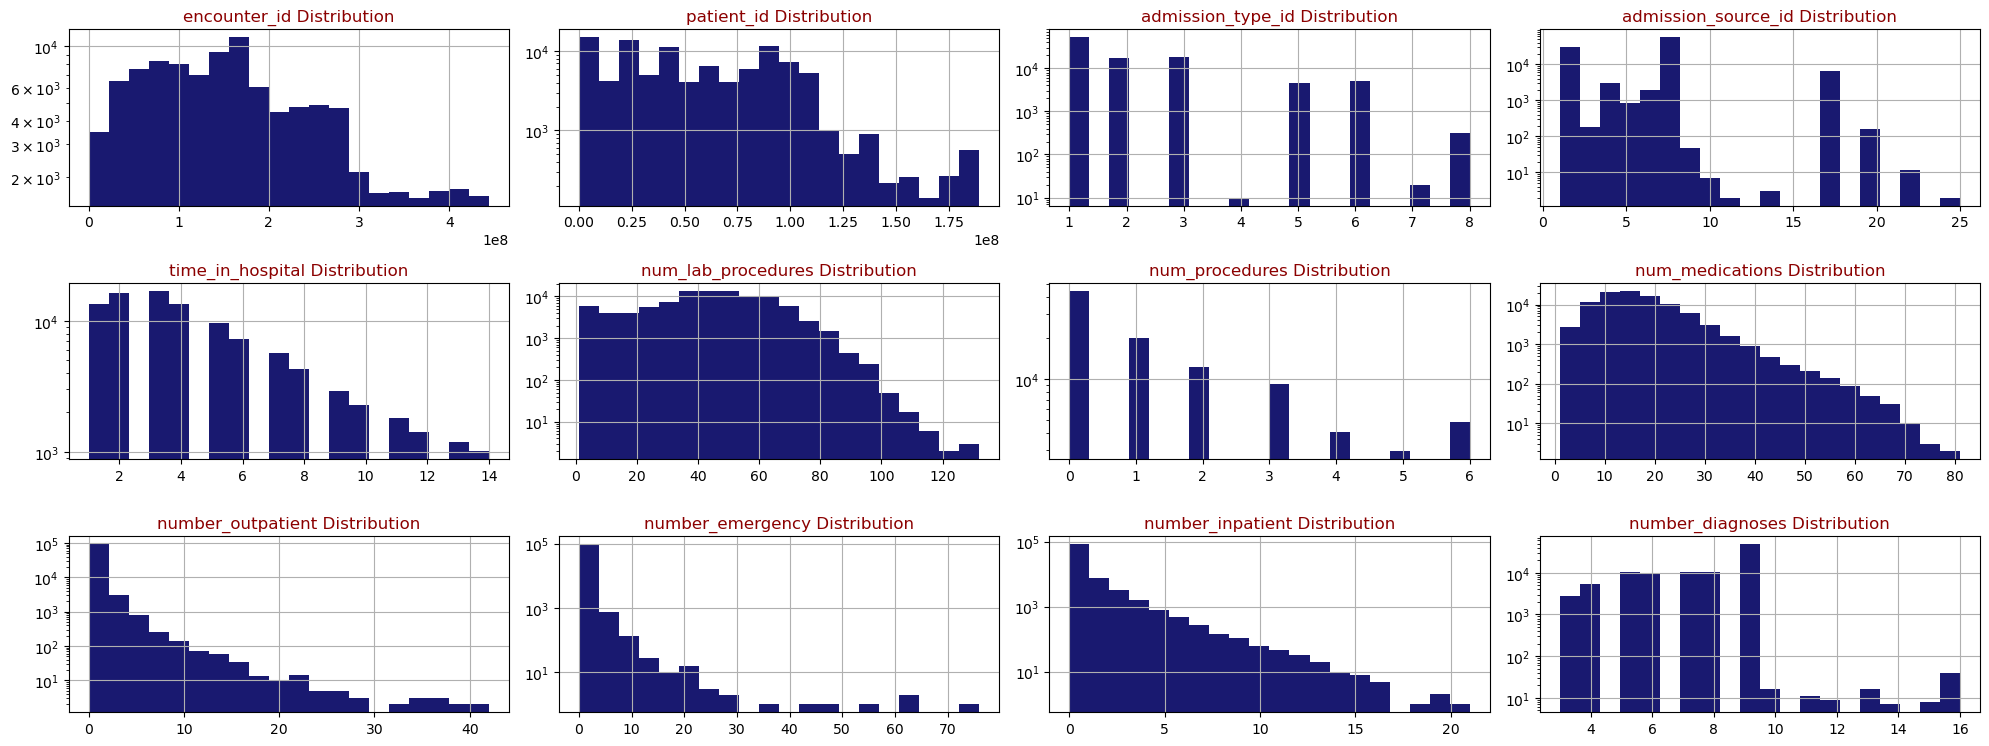

In [23]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
draw_histograms(df,num_col,8,4)

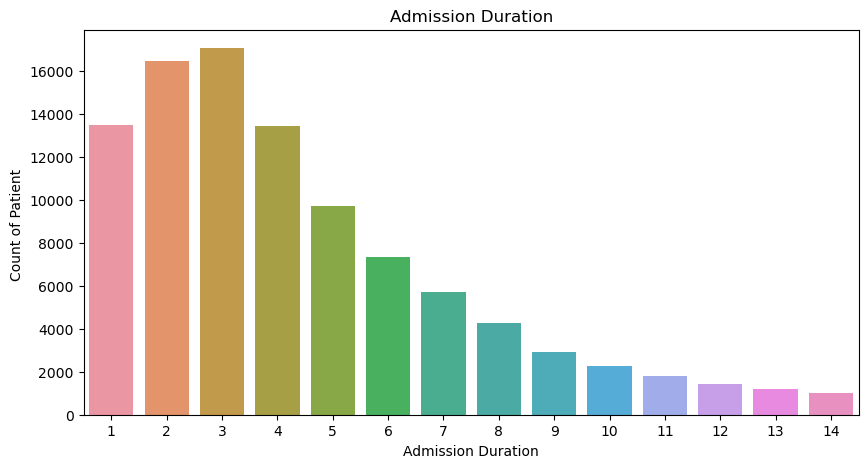

In [24]:
# visualizing the admission duration
plt.figure(figsize = (10,5))
sns.countplot(x = 'time_in_hospital', data = df)
plt.xlabel('Admission Duration')
plt.ylabel('Count of Patient ')
plt.title('Admission Duration');

The longest length of admission is 14 days having a total of 1,017 patients who have had to stay in the hospital for that duration and 13,490 patients were on 1 day admission.

The length of stay was at least 1 day and at most 14 days.

In [25]:
df = df.replace({"NO":0,
                    "<30":1,
                    ">30":0})

df['readmitted'].unique()

array([0, 1])

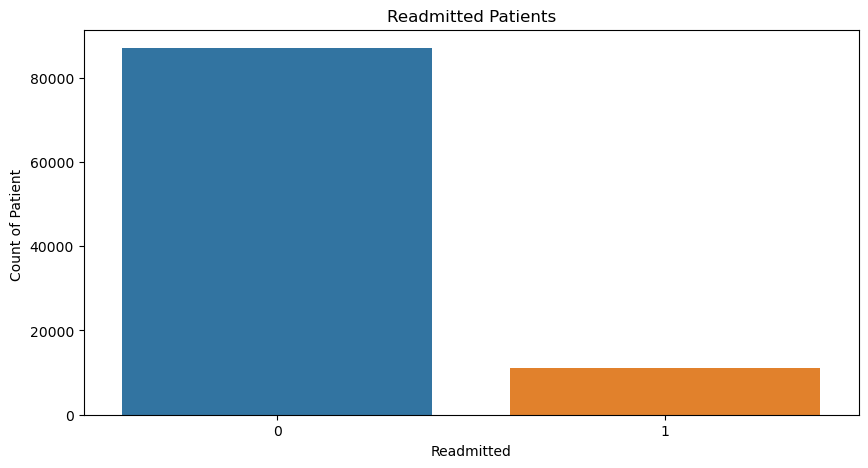

In [26]:
# visualizing the readmission column
plt.figure(figsize = (10,5))
sns.countplot(x = 'readmitted', data = df)
plt.xlabel('Readmitted')
plt.ylabel('Count of Patient ')
plt.title('Readmitted Patients');

In [27]:
df.groupby('readmitted')['patient_id'].count()

readmitted
0    86987
1    11066
Name: patient_id, dtype: int64

From the graph above, we can observe that from the total number of patients, 'No Readmission' had 52,338 , '<30' had 11,066 and '>30' had 34,649 

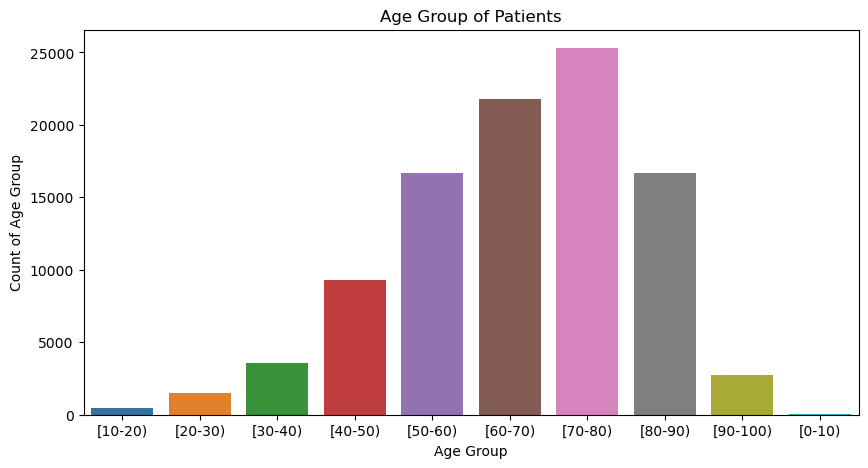

In [28]:
# visualizing the age bracket
plt.figure(figsize = (10,5))
sns.countplot(x = 'age', data = df)
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Age Group of Patients');

It can be observed that the age group with the highest diabetic population is 70 - 80 age group while the least age group is 0 -10.

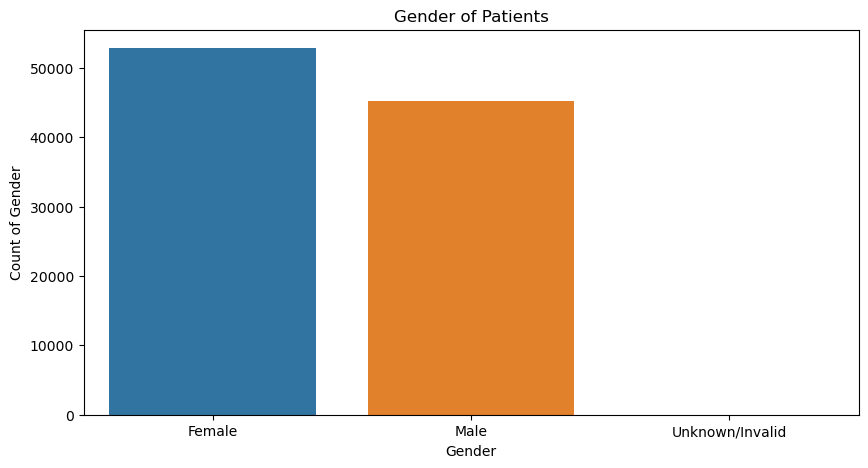

In [29]:
# visualizing the Gender
plt.figure(figsize = (10,5))
sns.countplot(x = 'gender', data = df)
plt.xlabel('Gender')
plt.ylabel('Count of Gender')
plt.title('Gender of Patients');

In [30]:
df.groupby('gender')['patient_id'].count()

gender
Female             52833
Male               45219
Unknown/Invalid        1
Name: patient_id, dtype: int64

Since Unknown/Invalid in the gender column has just 1, i will be dropping it as it will have no effect on the dataset if removed.

In [31]:
df = df.drop(df.loc[df["gender"]=="Unknown/Invalid"].index, axis=0)

In [32]:
df.groupby('gender')['patient_id'].count()

gender
Female    52833
Male      45219
Name: patient_id, dtype: int64

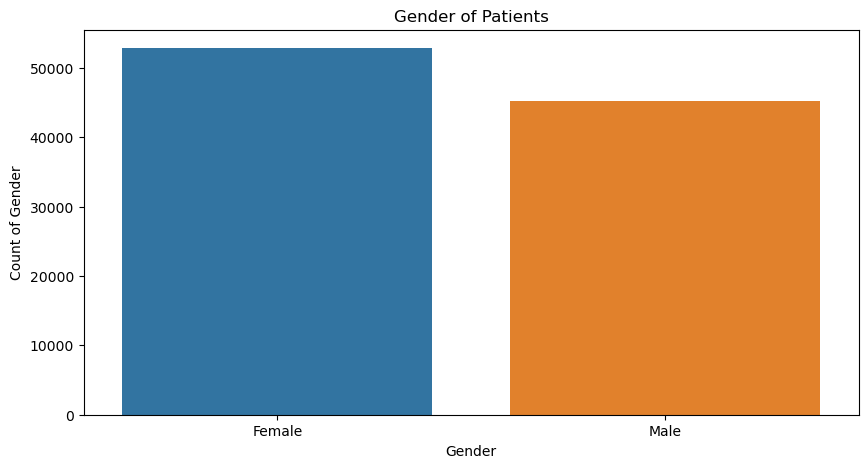

In [33]:
# visualizing the Gender
plt.figure(figsize = (10,5))
sns.countplot(x = 'gender', data = df)
plt.xlabel('Gender')
plt.ylabel('Count of Gender')
plt.title('Gender of Patients');

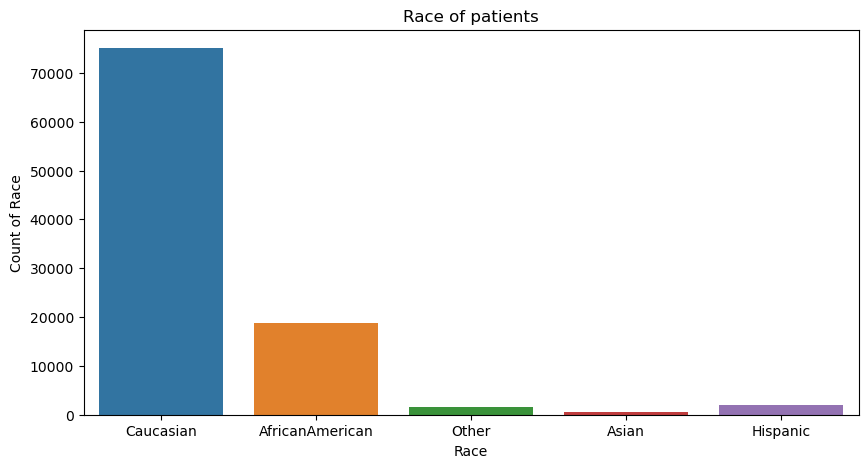

In [34]:
# Visualizing Race
plt.figure(figsize = (10,5))
sns.countplot(x = 'race', data = df)
plt.xlabel('Race')
plt.ylabel('Count of Race')
plt.title('Race of patients');

It can be observed the majority of the patients are Caucasian.

### Bivariate Analysis

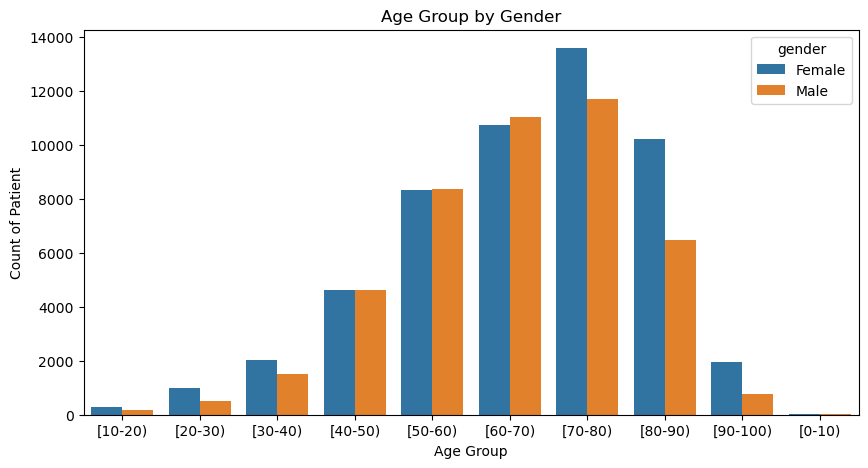

In [35]:
# Visualizing Age group by Gender

plt.figure(figsize = (10,5))
sns.countplot(x = 'age', data = df, hue = 'gender')
plt.xlabel('Age Group')
plt.ylabel('Count of Patient')
plt.title('Age Group by Gender');

In [36]:
df['discharge_disposition_id'].unique()

array(['Discharged to Home', 'Transferred', nan], dtype=object)

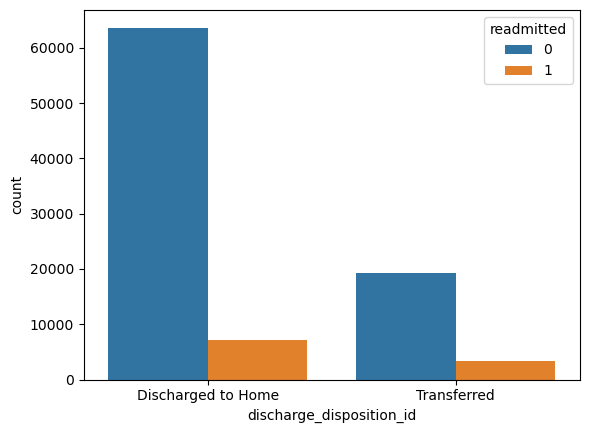

In [37]:
# Visualizing Discharged dispositon by Readmitted

sns.countplot(x ="discharge_disposition_id", data = df, hue = "readmitted");

In [38]:
df.groupby('discharge_disposition_id')['readmitted'].count()

discharge_disposition_id
Discharged to Home    70745
Transferred           22742
Name: readmitted, dtype: int64

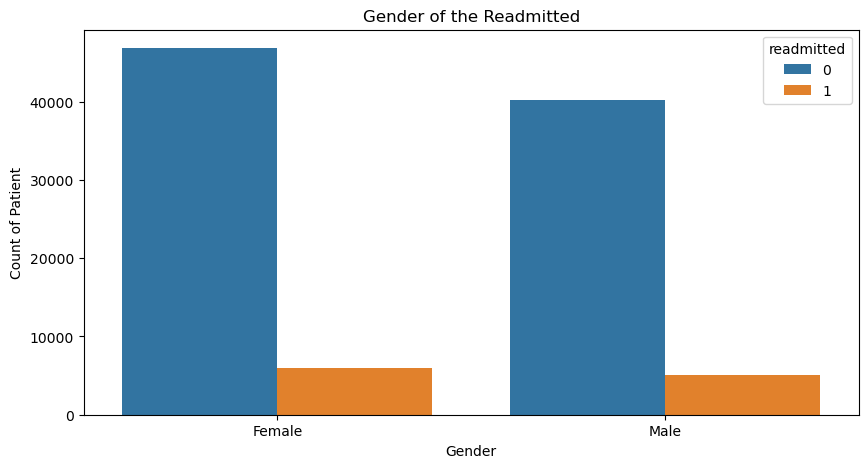

In [39]:
# Visualizing readmission by Gender

plt.figure(figsize = (10,5))
sns.countplot(x = 'gender', data = df, hue = 'readmitted')
plt.xlabel('Gender')
plt.ylabel('Count of Patient')
plt.title('Gender of the Readmitted');

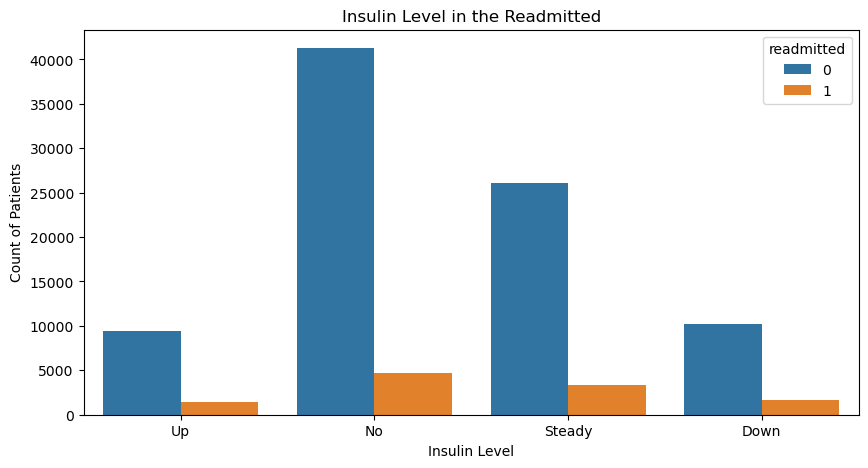

In [40]:
# Visualizing readmission by insulin level

plt.figure(figsize = (10,5))
sns.countplot(x = 'insulin', data = df, hue = 'readmitted')
plt.xlabel('Insulin Level')
plt.ylabel('Count of Patients')
plt.title('Insulin Level in the Readmitted');

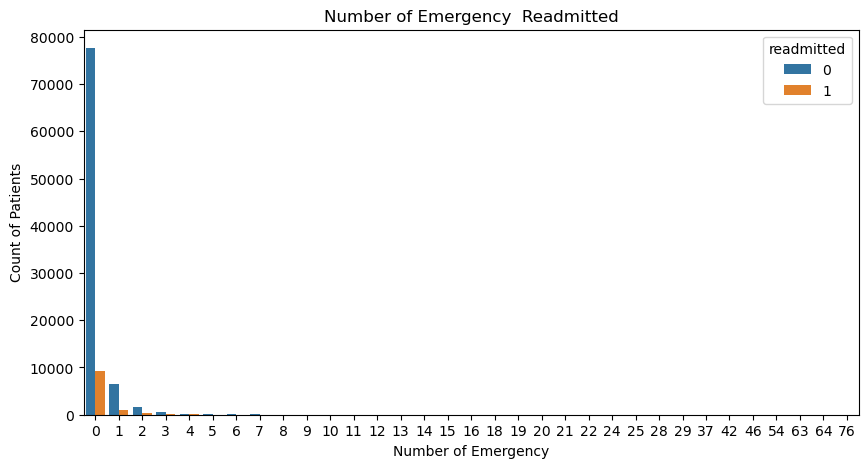

In [41]:
# Visualizing readmission by number_emergency

plt.figure(figsize = (10,5))
sns.countplot(x = 'number_emergency', data = df, hue = 'readmitted')
plt.xlabel('Number of Emergency')
plt.ylabel('Count of Patients')
plt.title('Number of Emergency  Readmitted');

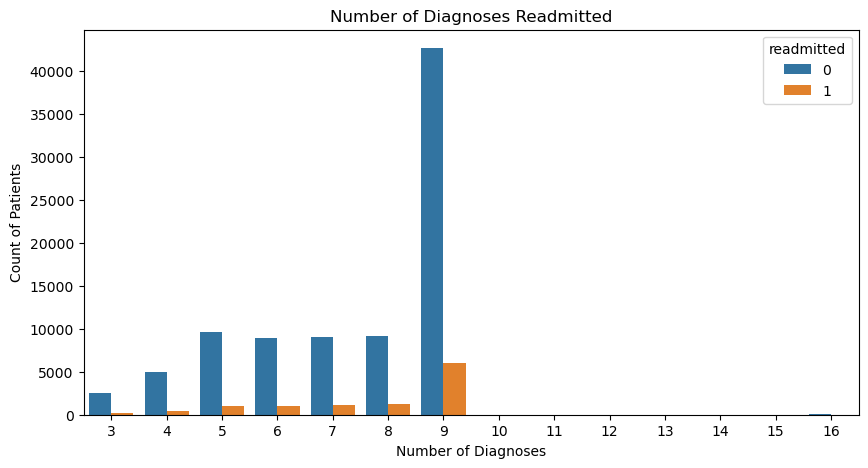

In [42]:
# Visualizing readmission by number_diagnoses


plt.figure(figsize = (10,5))
sns.countplot(x = 'number_diagnoses', data = df, hue = 'readmitted')
plt.xlabel('Number of Diagnoses')
plt.ylabel('Count of Patients')
plt.title('Number of Diagnoses Readmitted');

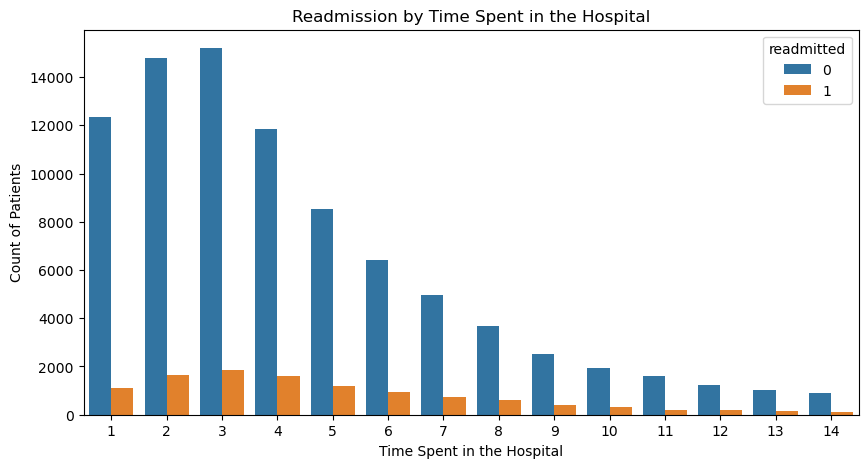

In [43]:
# Visualizing readmission by time in hospital

plt.figure(figsize = (10,5))
sns.countplot(x = 'time_in_hospital', data = df, hue = 'readmitted')
plt.xlabel('Time Spent in the Hospital')
plt.ylabel('Count of Patients')
plt.title('Readmission by Time Spent in the Hospital');

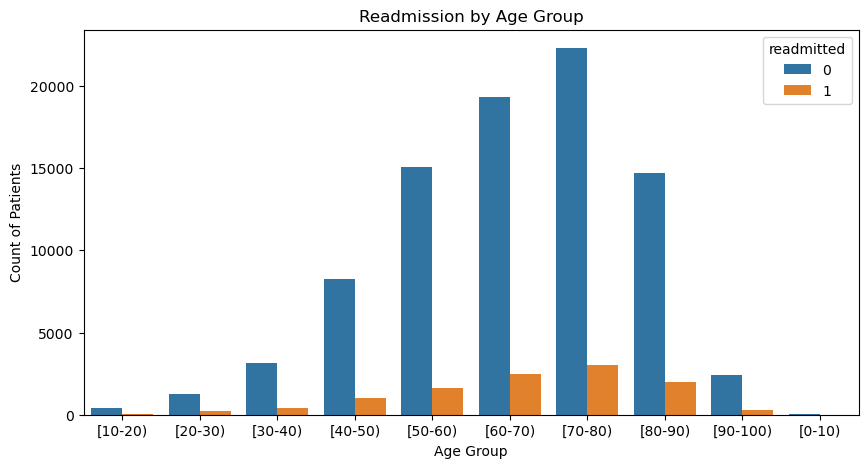

In [44]:
# Visualizing readmission by the Age Group

plt.figure(figsize = (10,5))
sns.countplot(x = 'age', data = df, hue = 'readmitted')
plt.xlabel('Age Group')
plt.ylabel('Count of Patients')
plt.title('Readmission by Age Group');

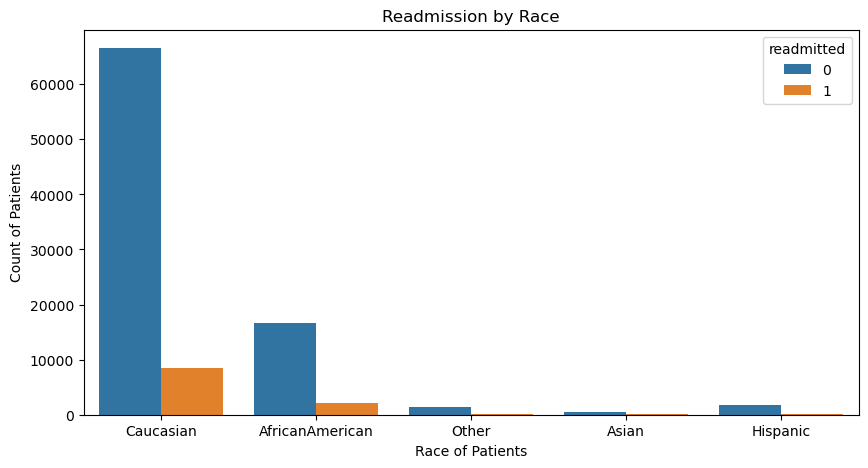

In [45]:
# Visualizing readmission by Race

plt.figure(figsize = (10,5))
sns.countplot(x = 'race', data = df, hue = 'readmitted')
plt.xlabel('Race of Patients')
plt.ylabel('Count of Patients')
plt.title('Readmission by Race');

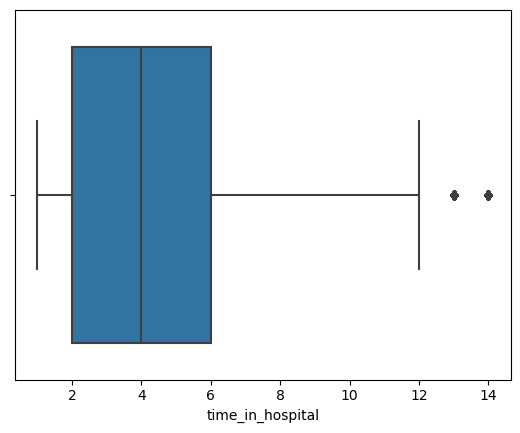

In [46]:
# Checking for outlier in Readmitted Column

sns.boxplot(x = df['time_in_hospital']);

### Multivariate Analysis

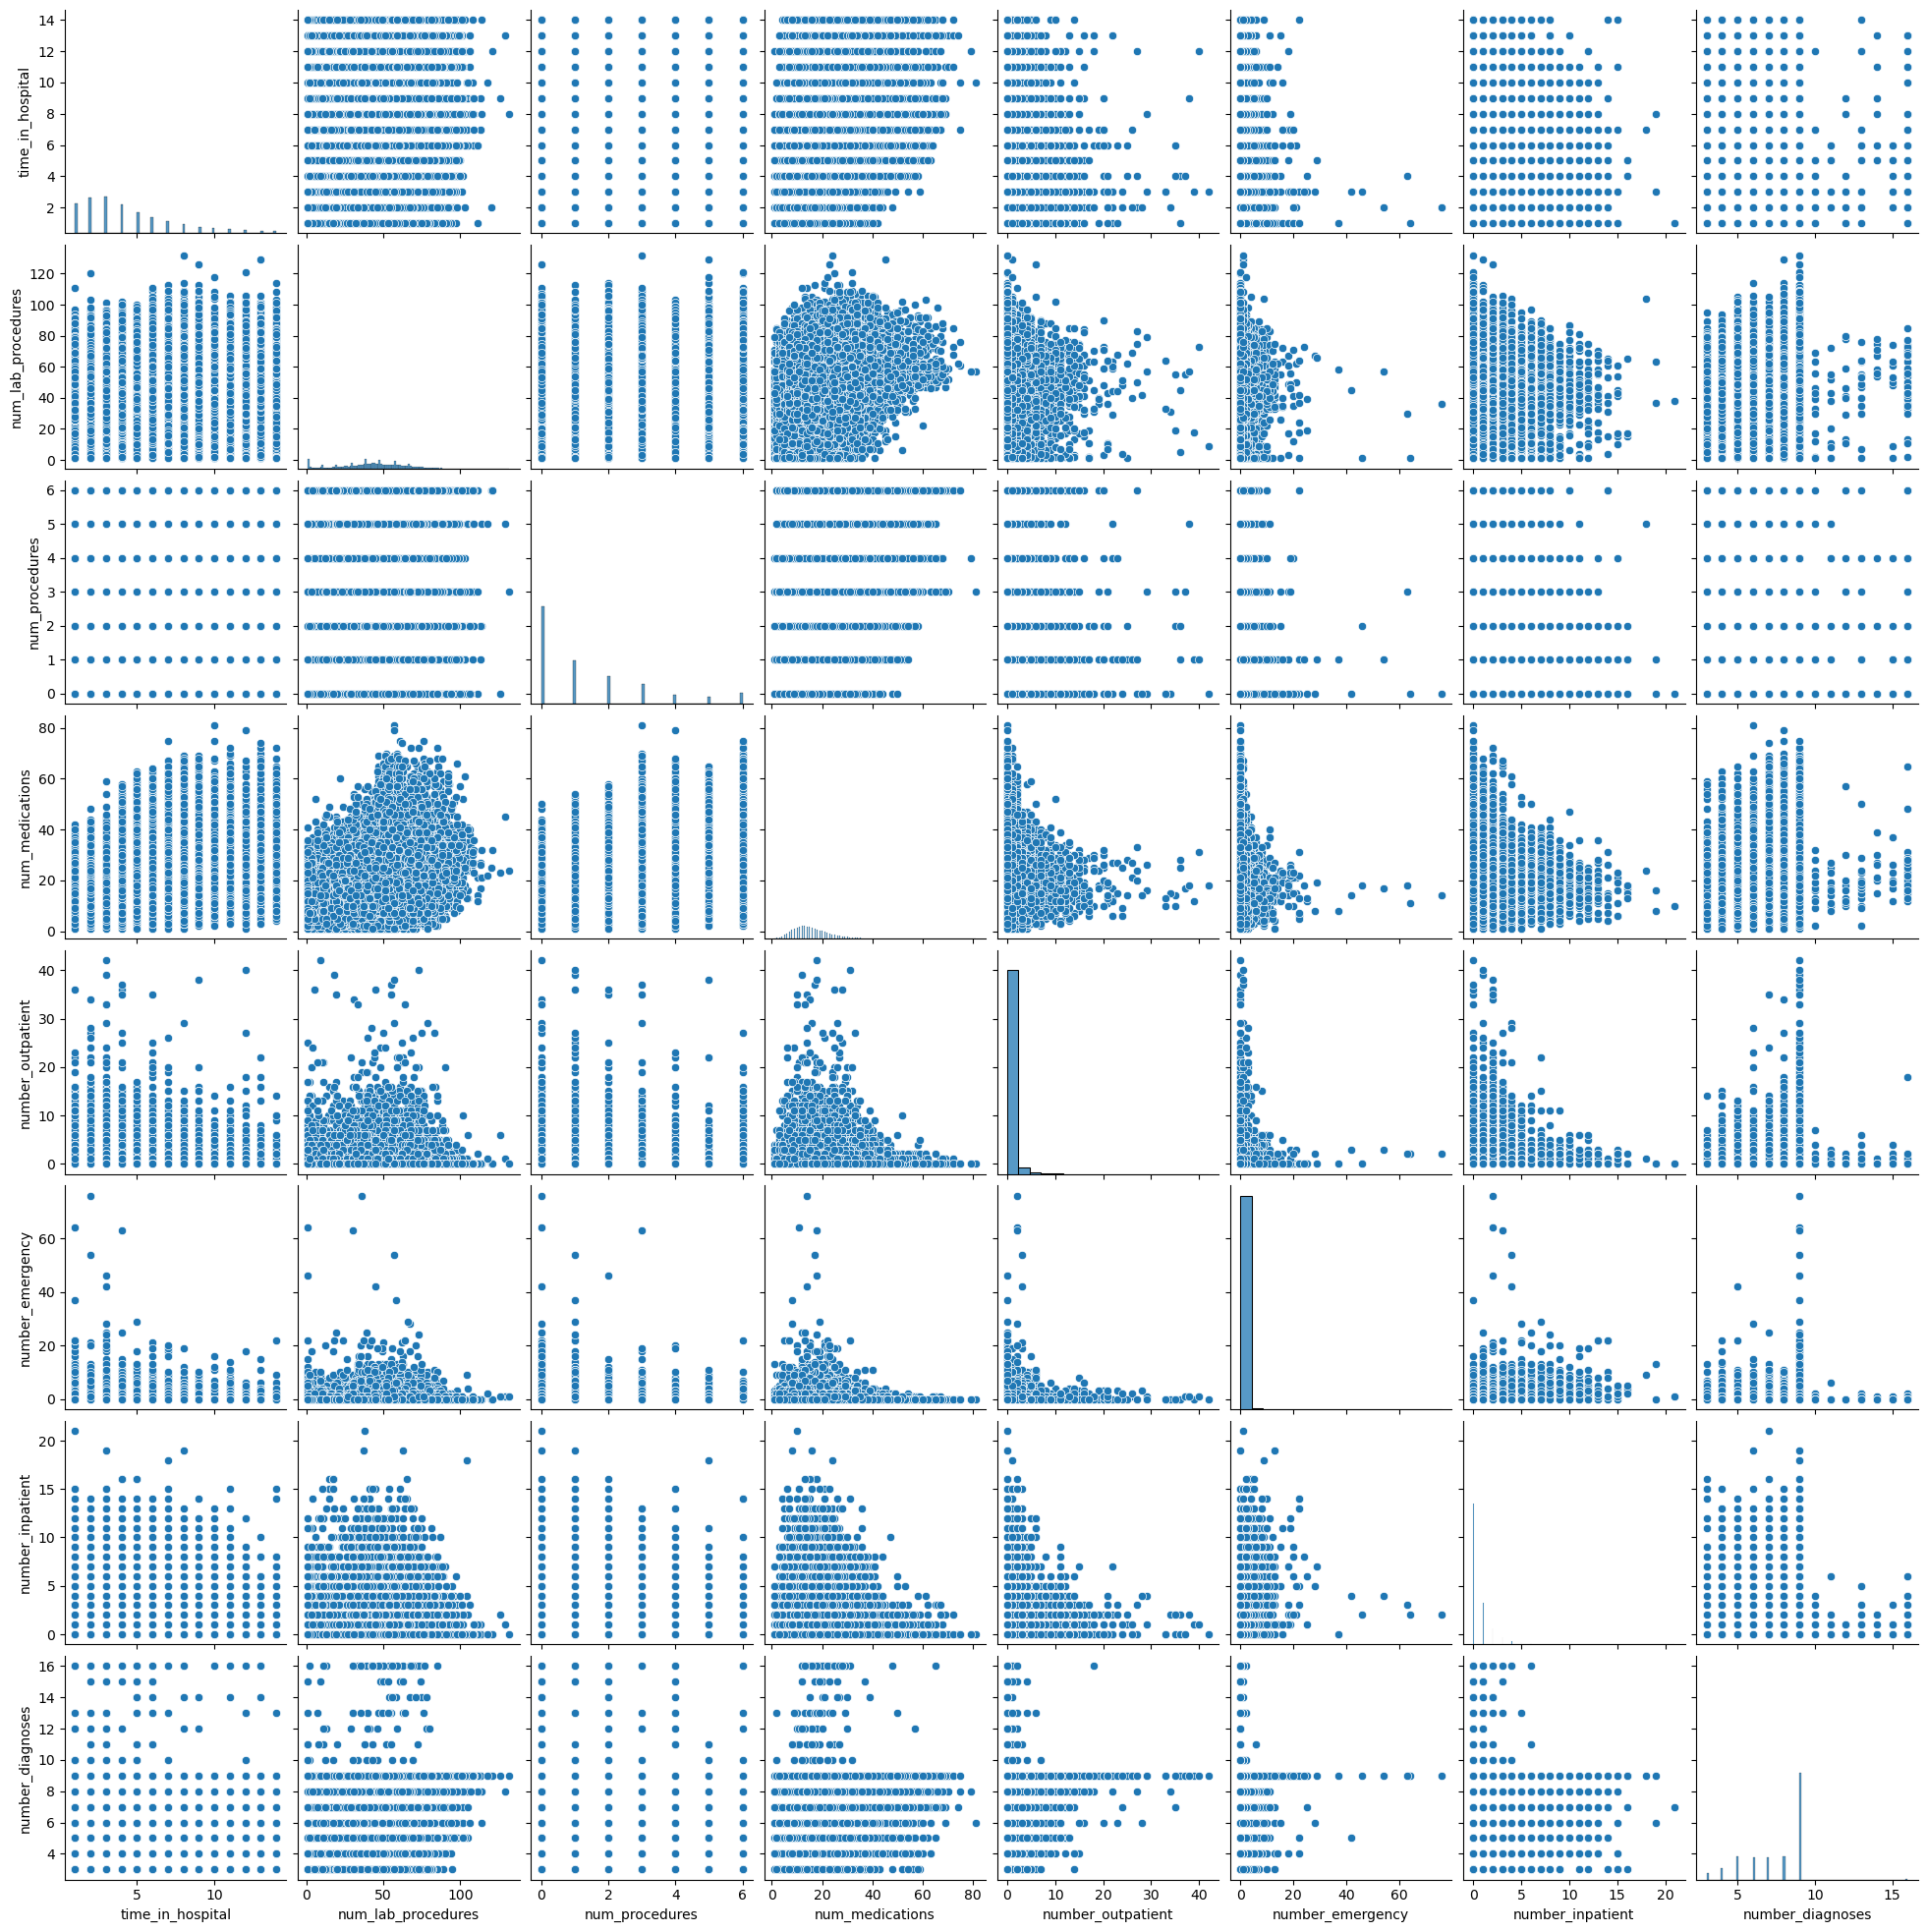

In [47]:
sns.pairplot(df, vars= ['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']);

In [48]:
df[num_col].corr()

,encounter_id,patient_id,admission_type_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
encounter_id,1.000000,0.512424,-0.157660,-0.115236,-0.068659,-0.029519,-0.016981,0.067615,0.102920,0.082749,0.028095,0.254963
patient_id,0.512424,1.000000,-0.013335,-0.035908,-0.029918,0.013437,-0.022295,0.010341,0.101731,0.060410,0.009592,0.214312
admission_type_id,-0.157660,-0.013335,1.000000,0.109274,-0.012202,-0.141201,0.129457,0.080268,0.026128,-0.019798,-0.037116,-0.122592
admission_source_id,-0.115236,-0.035908,0.109274,1.000000,-0.007989,0.048039,-0.134654,-0.055733,0.025304,0.058999,0.035535,0.071749
time_in_hospital,-0.068659,-0.029918,-0.012202,-0.007989,1.000000,0.318632,0.191164,0.464212,-0.010913,-0.010508,0.072282,0.211225
num_lab_procedures,-0.029519,0.013437,-0.141201,0.048039,0.318632,1.000000,0.058710,0.267863,-0.008625,-0.002142,0.039198,0.150257
num_procedures,-0.016981,-0.022295,0.129457,-0.134654,0.191164,0.058710,1.000000,0.382952,-0.026453,-0.038723,-0.067535,0.058973
num_medications,0.067615,0.010341,0.080268,-0.055733,0.464212,0.267863,0.382952,1.000000,0.042652,0.012127,0.062905,0.241501
number_outpatient,0.102920,0.101731,0.026128,0.025304,-0.010913,-0.008625,-0.026453,0.042652,1.000000,0.091033,0.105979,0.091414
number_emergency,0.082749,0.060410,-0.019798,0.058999,-0.010508,-0.002142,-0.038723,0.012127,0.091033,1.000000,0.267174,0.054616


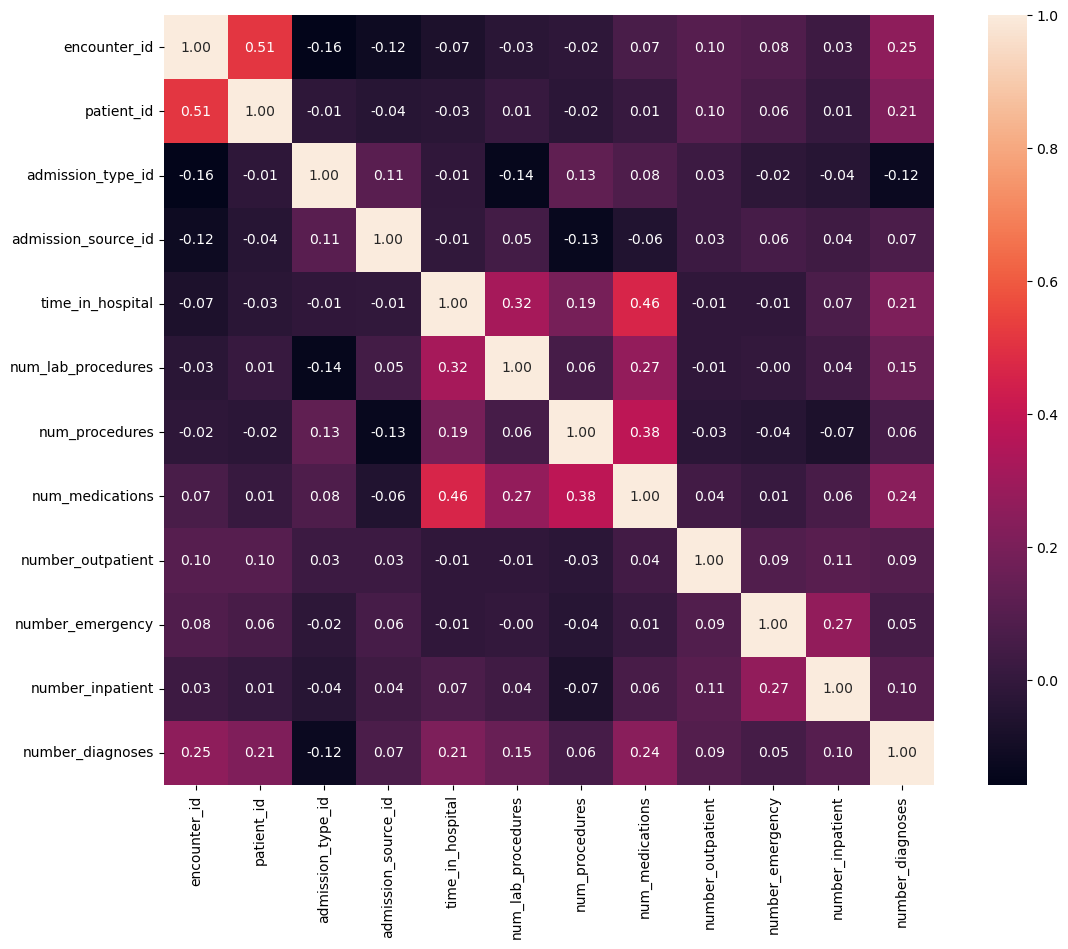

In [49]:
# Correlation between campaign and other features in the dataset

plt.figure(figsize = (14,10))

hm = sns.heatmap(df[num_col].corr(), cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size':10}) 

## FEATURE ENGINEERING AND DATA PREPROCESSING

In [50]:
# Creating a copy of the dataframe

df1 = df.copy()

In [51]:
# Converting Categorical Data of any column to Numerical Data

# label Encoding
encoder = LabelEncoder() # initializing

for i in df1.columns[1:]:
    if(df1[i].dtype == 'object'):
        df1[i] = encoder.fit_transform(df1[i])
    else:
        df1[i] = df1[i]
        
df1

,encounter_id,patient_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,149190,55629189,2,0,1,1,0,7,3,6,18,59,0,18,0,0,0,143,77,121,9,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,0,1,0
1,64410,86047875,0,0,2,1,0,7,2,6,18,11,5,13,2,0,1,454,76,763,6,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0
2,500364,82442376,2,1,3,1,0,7,2,6,18,44,1,16,0,0,0,553,95,248,7,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,0,1,0
3,16680,42519267,2,1,4,1,0,7,1,6,18,51,0,8,0,0,0,54,23,86,5,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,0,1,0
4,35754,82637451,2,1,5,2,0,2,3,6,18,31,6,16,0,0,0,263,244,86,9,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98048,443847548,100162476,0,1,7,1,1,7,3,6,18,51,0,16,0,0,0,102,146,295,9,2,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0
98049,443847782,74694222,0,0,8,1,1,5,5,6,18,33,3,18,0,0,1,381,131,535,9,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,1,1,0
98050,443854148,41088789,2,1,7,1,0,7,1,6,18,53,0,9,1,0,0,236,387,159,13,2,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0
98051,443857166,31693671,2,0,8,2,1,7,10,6,62,45,2,21,0,0,1,691,140,667,9,1,1,1,1,1,0,2,1,0,2,1,1,1,0,0,0,0,3,1,0,0,0,0,0,1,0


In [52]:
X = df1.drop(columns = ['encounter_id','patient_id','readmitted','payer_code'],axis = 1)

In [53]:
y = df1['readmitted']

### Feature Scaling

In [54]:
# Scaling the Predictor

scaler = StandardScaler()
scaling =  pd.DataFrame(scaler.fit_transform(X))
scaling.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0.396135,-0.925141,-3.287868,-0.707395,-0.581464,0.300436,-0.475104,-0.145938,0.804171,-0.790599,0.231907,-0.293279,-0.214727,-0.508939,-1.220609,-1.309714,-0.909952,0.811970,-0.449233,-0.115287,-0.080421,-0.027656,-0.209004,-0.003194,-0.333744,-0.295558,-0.014981,-0.265798,-0.248339,-0.053424,-0.015099,-0.005531,-0.019191,0.0,0.0,1.905570,-0.081784,-0.011515,-0.003194,0.0,-0.003194,-1.079609,0.548896
1,-1.927152,-0.925141,-2.646461,-0.707395,-0.581464,0.300436,-0.809210,-0.145938,-1.630937,2.136003,-0.384733,1.265132,-0.214727,0.277831,0.729864,-1.316330,2.750562,-0.825171,-0.449233,-0.115287,-0.080421,-0.027656,-0.209004,-0.003194,2.404002,-0.295558,-0.014981,-0.265798,-0.248339,-0.053424,-0.015099,-0.005531,-0.019191,0.0,0.0,-0.477945,-0.081784,-0.011515,-0.003194,0.0,-0.003194,0.926261,0.548896
2,0.396135,1.080917,-2.005054,-0.707395,-0.581464,0.300436,-0.809210,-0.145938,0.043200,-0.205279,-0.014749,-0.293279,-0.214727,-0.508939,1.350754,-1.190622,-0.185832,-0.279458,-0.449233,-0.115287,-0.080421,-0.027656,-0.209004,-0.003194,-0.333744,-0.295558,-0.014981,-0.265798,-0.248339,-0.053424,-0.015099,-0.005531,-0.019191,0.0,0.0,1.905570,-0.081784,-0.011515,-0.003194,0.0,-0.003194,-1.079609,0.548896
3,0.396135,1.080917,-1.363647,-0.707395,-0.581464,0.300436,-1.143317,-0.145938,0.398320,-0.790599,-1.001373,-0.293279,-0.214727,-0.508939,-1.778783,-1.666989,-1.109513,-1.370885,-0.449233,-0.115287,-0.080421,-0.027656,-0.209004,-0.003194,2.404002,-0.295558,-0.014981,-0.265798,-0.248339,-0.053424,-0.015099,-0.005531,-0.019191,0.0,0.0,0.713812,-0.081784,-0.011515,-0.003194,0.0,-0.003194,-1.079609,0.548896
4,0.396135,1.080917,-0.722240,-0.017794,-0.581464,-0.927579,-0.475104,-0.145938,-0.616309,2.721323,-0.014749,-0.293279,-0.214727,-0.508939,-0.468015,-0.204806,-1.109513,0.811970,-0.449233,-0.115287,-0.080421,-0.027656,-0.209004,-0.003194,-0.333744,-0.295558,-0.014981,-0.265798,-0.248339,-0.053424,-0.015099,-0.005531,-0.019191,0.0,0.0,0.713812,-0.081784,-0.011515,-0.003194,0.0,-0.003194,0.926261,0.548896


In [55]:
# Checking the if the Target variable is balanced

y.value_counts()

readmitted
0    86986
1    11066
Name: count, dtype: int64

### MODEL SELECTION WITH IMBALANCED DATASET

### TRAIN-TEST-SPLIT

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X, y,train_size=0.7,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(68636, 43)
(29416, 43)
(68636,)
(29416,)


In [57]:
# Logistic Regression Algorithm

lr = LogisticRegression() #initialization

lr.fit(X_train, y_train)

ly_pred = lr.predict(X_test)

# Evaluation Metrics
print('Logistic Regression')
print('Accuracy:', accuracy_score(y_test, ly_pred))
print('Precision:',precision_score(y_test, ly_pred))
print('Recall:', recall_score(y_test, ly_pred))
print('F1 Score:', f1_score(y_test, ly_pred))
print('AUC_ROC:', roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.8907397334783791
Precision: 0.5365853658536586
Recall: 0.013664596273291925
F1 Score: 0.026650514839491216
AUC_ROC: 0.5061069965638868


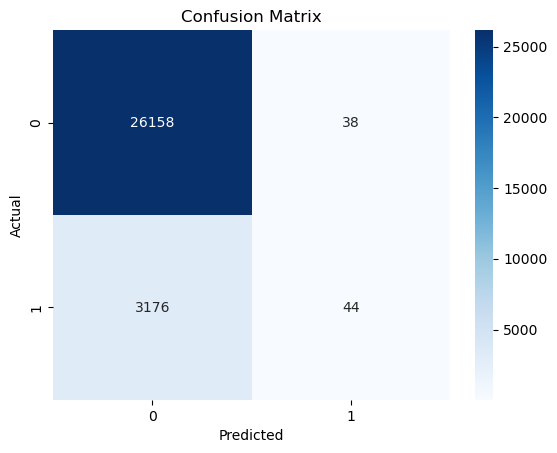

In [58]:
# Creating Confusion Metrics

lcm = confusion_matrix(y_test, ly_pred)

# Visualizing the confusion metrics
sns.heatmap(lcm, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show();

True Negatives (TN): This represents the number of correctly predicted instances of the negative class (actual negative, predicted negative). In this case, there are 26,158 instances correctly predicted as negative.

False Positives (FP): This represents the number of instances incorrectly predicted as positive when they are actually negative (actual negative, predicted positive). In this case, there are 38 instances incorrectly predicted as positive when they are actually negative.


False Negatives (FN): This represents the number of instances incorrectly predicted as negative when they are actually positive (actual positive, predicted negative). In this case, there are 3,176 instances incorrectly predicted as negative when they are actually positive.


True Positives (TP): This represents the number of correctly predicted instances of the positive class (actual positive, predicted positive). In this case, there are 44 instances correctly predicted as positive.

In [59]:
#Random Forest Classifier/ Algorithm

rfc = RandomForestClassifier() #initialization

rfc.fit(X_train, y_train)

rfy_pred = rfc.predict(X_test)

# Evaluation Metrics
print('Random Forest')
print('Accuracy:', accuracy_score(y_test, rfy_pred))
print('Precision:',precision_score(y_test, rfy_pred))
print('Recall:', recall_score(y_test, rfy_pred))
print('F1 Score:', f1_score(y_test, rfy_pred))
print('AUC_ROC:', roc_auc_score(y_test, rfy_pred))

Random Forest
Accuracy: 0.8906717432689693
Precision: 0.5416666666666666
Recall: 0.008074534161490683
F1 Score: 0.01591187270501836
AUC_ROC: 0.5036173556438848


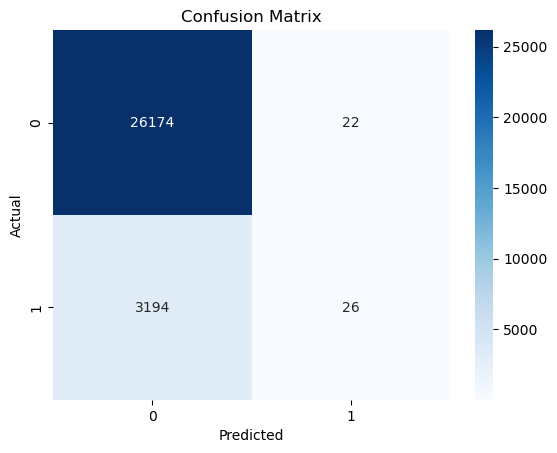

In [60]:
# Creating Confusion Metrics

rfm = confusion_matrix(y_test, rfy_pred)

# Visualizing the confusion metrics
sns.heatmap(rfm, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show();

True Negatives (TN): This represents the number of correctly predicted instances of the negative class (actual negative, predicted negative). In this case, there are 26,179 instances correctly predicted as negative.

False Positives (FP): This represents the number of instances incorrectly predicted as positive when they are actually negative (actual negative, predicted positive). In this case, there are 17 instances incorrectly predicted as positive when they are actually negative.


False Negatives (FN): This represents the number of instances incorrectly predicted as negative when they are actually positive (actual positive, predicted negative). In this case, there are 3,195 instances incorrectly predicted as negative when they are actually positive.


True Positives (TP): This represents the number of correctly predicted instances of the positive class (actual positive, predicted positive). In this case, there are 25 instances correctly predicted as positive.

In [61]:
#KNeighborsClassifier/ Algorithm

knc = KNeighborsClassifier() #initialization

knc.fit(X_train, y_train)

kny_pred = knc.predict(X_test)

# Evaluation Metrics
print('KNeighbors')
print('Accuracy:', accuracy_score(y_test, kny_pred))
print('Precision:',precision_score(y_test, kny_pred))
print('Recall:', recall_score(y_test, kny_pred))
print('F1 Score:', f1_score(y_test, kny_pred))
print('AUC_ROC:', roc_auc_score(y_test, kny_pred))

KNeighbors
Accuracy: 0.8795893391351646
Precision: 0.140625
Recall: 0.01956521739130435
F1 Score: 0.03435114503816794
AUC_ROC: 0.5024341585505918


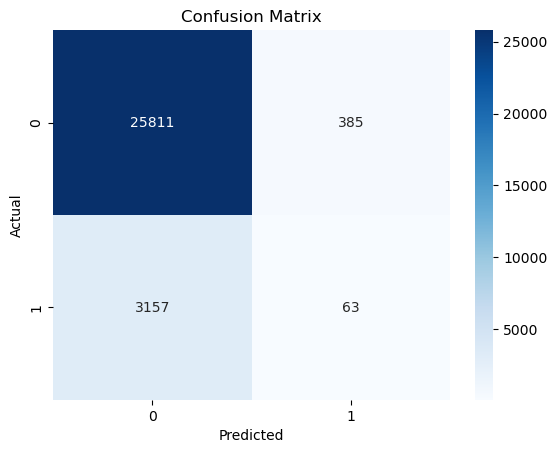

In [62]:
# Creating Confusion Metrics

knm = confusion_matrix(y_test, kny_pred)

# Visualizing the confusion metrics
sns.heatmap(knm, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show();

True Negatives (TN): This represents the number of correctly predicted instances of the negative class (actual negative, predicted negative). In this case, there are 25,811 instances correctly predicted as negative.

False Positives (FP): This represents the number of instances incorrectly predicted as positive when they are actually negative (actual negative, predicted positive). In this case, there are 385 instances incorrectly predicted as positive when they are actually negative.


False Negatives (FN): This represents the number of instances incorrectly predicted as negative when they are actually positive (actual positive, predicted negative). In this case, there are 3,157 instances incorrectly predicted as negative when they are actually positive.


True Positives (TP): This represents the number of correctly predicted instances of the positive class (actual positive, predicted positive). In this case, there are 63 instances correctly predicted as positive.

In [63]:
# DecisionTreeClassifier/ Algorithm

dtc = DecisionTreeClassifier() #initialization

dtc.fit(X_train, y_train)

dty_pred = dtc.predict(X_test)

# Evaluation Metrics
print('DecisionTree')
print('Accuracy:', accuracy_score(y_test, dty_pred))
print('Precision:',precision_score(y_test, dty_pred))
print('Recall:', recall_score(y_test, dty_pred))
print('F1 Score:', f1_score(y_test, dty_pred))
print('AUC_ROC:', roc_auc_score(y_test, dty_pred))

DecisionTree
Accuracy: 0.7919499592058743
Precision: 0.14599609375
Recall: 0.18571428571428572
F1 Score: 0.16347731000546747
AUC_ROC: 0.5260912243963092


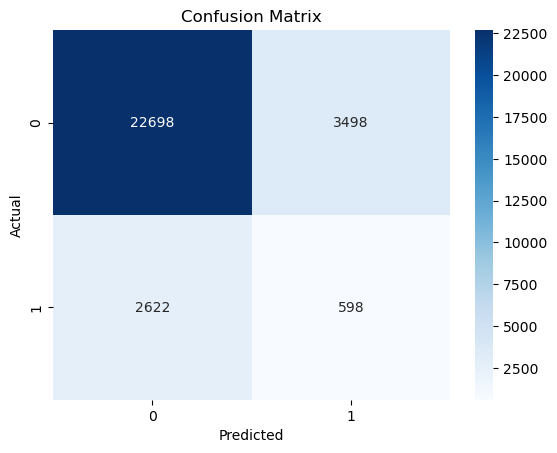

In [64]:
# Creating Confusion Metrics

dtm = confusion_matrix(y_test, dty_pred)

# Visualizing the confusion metrics
sns.heatmap(dtm, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show();

True Negatives (TN): This represents the number of correctly predicted instances of the negative class (actual negative, predicted negative). In this case, there are 22,755 instances correctly predicted as negative.

False Positives (FP): This represents the number of instances incorrectly predicted as positive when they are actually negative (actual negative, predicted positive). In this case, there are 3,441 instances incorrectly predicted as positive when they are actually negative.


False Negatives (FN): This represents the number of instances incorrectly predicted as negative when they are actually positive (actual positive, predicted negative). In this case, there are 2,622 instances incorrectly predicted as negative when they are actually positive.


True Positives (TP): This represents the number of correctly predicted instances of the positive class (actual positive, predicted positive). In this case, there are 598 instances correctly predicted as positive.

In [65]:
#XGBoost Classifier/ Algorithm 

clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)

clfy_pred = clf.predict(X_test)

# Evaluation Metrics
print('Random Forest')
print('Accuracy:', accuracy_score(y_test, clfy_pred))
print('Precision:',precision_score(y_test, clfy_pred))
print('Recall:', recall_score(y_test, clfy_pred))
print('F1 Score:', f1_score(y_test, clfy_pred))
print('AUC_ROC:', roc_auc_score(y_test, clfy_pred))

Random Forest
Accuracy: 0.889005983138428
Precision: 0.37967914438502676
Recall: 0.022049689440993787
F1 Score: 0.04167889638978574
AUC_ROC: 0.508810766235232


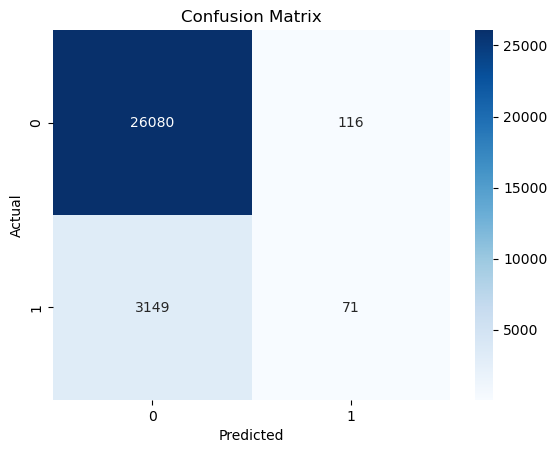

In [66]:
# Creating Confusion Metrics

clfm = confusion_matrix(y_test, clfy_pred)

# Visualizing the confusion metrics
sns.heatmap(clfm, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show();

True Negatives (TN): This represents the number of correctly predicted instances of the negative class (actual negative, predicted negative). In this case, there are 26,080 instances correctly predicted as negative.

False Positives (FP): This represents the number of instances incorrectly predicted as positive when they are actually negative (actual negative, predicted positive). In this case, there are 116 instances incorrectly predicted as positive when they are actually negative.


False Negatives (FN): This represents the number of instances incorrectly predicted as negative when they are actually positive (actual positive, predicted negative). In this case, there are 3,149 instances incorrectly predicted as negative when they are actually positive.


True Positives (TP): This represents the number of correctly predicted instances of the positive class (actual positive, predicted positive). In this case, there are 71 instances correctly predicted as positive.

## MODEL SELECTION DEALING WITH THE IMBALANCED DATASET

### Over Sampling

In [67]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [68]:
Counter(y)

Counter({0: 86986, 1: 11066})

In [69]:
# Calculate the desired number of samples for the minority class
desired_minority_samples = int(6 * Counter(y)[1])

# Initialize the RandomOverSampler with the desired sampling strategy
os = RandomOverSampler(sampling_strategy={1: desired_minority_samples})
X_os,y_os = os.fit_resample(X,y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_os)))

The number of classes before fit Counter({0: 86986, 1: 11066})
The number of classes after fit Counter({0: 86986, 1: 66396})


### TRAIN-TEST-SPLIT

In [70]:
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X_os, y_os,train_size=0.7,random_state=42)

print(X_train_os.shape)
print(X_test_os.shape)
print(y_train_os.shape)
print(y_test_os.shape)

(107367, 43)
(46015, 43)
(107367,)
(46015,)


In [114]:
#Random Forest Classifier/ Algorithm with OverSampling

rfco = RandomForestClassifier(n_estimators=30,max_depth=20) #initialization

rfco.fit(X_train_os, y_train_os)

rfyo_pred = rfco.predict(X_test_os)

# Evaluation Metrics
print('Random Forest')
print('Accuracy:', accuracy_score(y_test_os, rfyo_pred))
print('Precision:',precision_score(y_test_os, rfyo_pred))
print('Recall:', recall_score(y_test_os, rfyo_pred))
print('F1 Score:', f1_score(y_test_os,rfyo_pred))
print('AUC_ROC:', roc_auc_score(y_test_os,rfyo_pred))

Random Forest
Accuracy: 0.9345213517331306
Precision: 0.9356029532403609
Recall: 0.9121719570107473
F1 Score: 0.9237388949353312
AUC_ROC: 0.9319414187206755


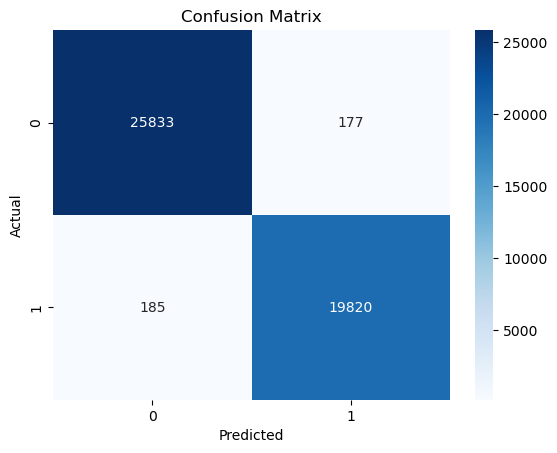

In [73]:
# Creating Confusion Metrics

rfmo = confusion_matrix(y_test_os, rfyo_pred)

# Visualizing the confusion metrics
sns.heatmap(rfmo, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show();

True Negatives (TN): This represents the number of correctly predicted instances of the negative class (actual negative, predicted negative). In this case, there are 25,803 instances correctly predicted as negative.

False Positives (FP): This represents the number of instances incorrectly predicted as positive when they are actually negative (actual negative, predicted positive). In this case, there are 207 instances incorrectly predicted as positive when they are actually negative.


False Negatives (FN): This represents the number of instances incorrectly predicted as negative when they are actually positive (actual positive, predicted negative). In this case, there are 236 instances incorrectly predicted as negative when they are actually positive.


True Positives (TP): This represents the number of correctly predicted instances of the positive class (actual positive, predicted positive). In this case, there are 19,769 instances correctly predicted as positive.

In [74]:
# Logistic Regression Algorithm with OverSampling

lro = LogisticRegression() #initialization

lro.fit(X_train_os, y_train_os)

lyo_pred = lro.predict(X_test_os)

# Evaluation Metrics
print('Logistic Regression')
print('Accuracy:', accuracy_score(y_test_os, lyo_pred))
print('Precision:',precision_score(y_test_os, lyo_pred))
print('Recall:', recall_score(y_test_os, lyo_pred))
print('F1 Score:', f1_score(y_test_os, lyo_pred))
print('AUC_ROC:', roc_auc_score(y_test_os, lyo_pred))

Logistic Regression
Accuracy: 0.6110616103444529
Precision: 0.6181614349775785
Recall: 0.27563109222694326
F1 Score: 0.3812618841832325
AUC_ROC: 0.57234072873554


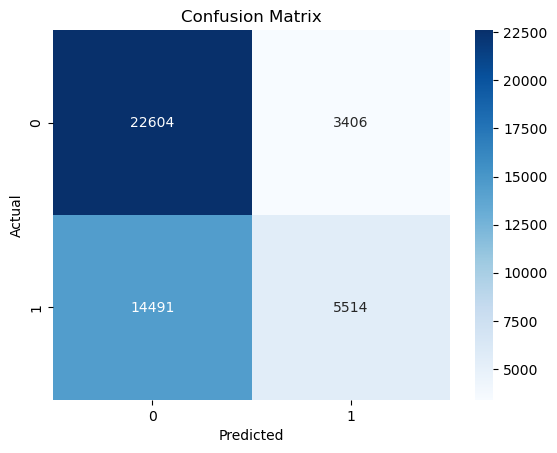

In [75]:
# Creating Confusion Metrics

lymo = confusion_matrix(y_test_os, lyo_pred)

# Visualizing the confusion metrics
sns.heatmap(lymo, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show();

True Negatives (TN): This represents the number of correctly predicted instances of the negative class (actual negative, predicted negative). In this case, there are 22,577 instances correctly predicted as negative.

False Positives (FP): This represents the number of instances incorrectly predicted as positive when they are actually negative (actual negative, predicted positive). In this case, there are 3,433 instances incorrectly predicted as positive when they are actually negative.


False Negatives (FN): This represents the number of instances incorrectly predicted as negative when they are actually positive (actual positive, predicted negative). In this case, there are 14,326 instances incorrectly predicted as negative when they are actually positive.


True Positives (TP): This represents the number of correctly predicted instances of the positive class (actual positive, predicted positive). In this case, there are 5,679 instances correctly predicted as positive.

In [76]:
#XGBoost Classifier/ Algorithm with OverSampling

clfo = xgb.XGBClassifier()
clfo.fit(X_train_os, y_train_os)

clyo_pred = clfo.predict(X_test_os)

# Evaluation Metrics
print('XGBoost Classifier')
print('Accuracy:', accuracy_score(y_test_os, clyo_pred))
print('Precision:',precision_score(y_test_os, clyo_pred))
print('Recall:', recall_score(y_test_os, clyo_pred))
print('F1 Score:', f1_score(y_test_os, clyo_pred))
print('AUC_ROC:', roc_auc_score(y_test_os, clyo_pred))

XGBoost Classifier
Accuracy: 0.7211126806476149
Precision: 0.7158160808858931
Recall: 0.5945513621594601
F1 Score: 0.6495726495726496
AUC_ROC: 0.7065029013796148


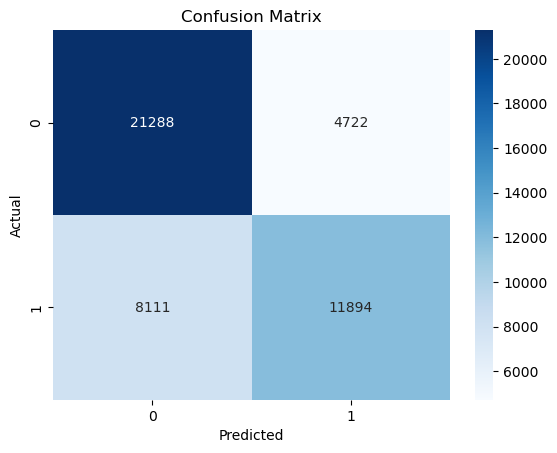

In [77]:
# Creating Confusion Metrics

clmo = confusion_matrix(y_test_os, clyo_pred)

# Visualizing the confusion metrics
sns.heatmap(clmo, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show();

True Negatives (TN): This represents the number of correctly predicted instances of the negative class (actual negative, predicted negative). In this case, there are 21,363 instances correctly predicted as negative.

False Positives (FP): This represents the number of instances incorrectly predicted as positive when they are actually negative (actual negative, predicted positive). In this case, there are 4,647 instances incorrectly predicted as positive when they are actually negative.


False Negatives (FN): This represents the number of instances incorrectly predicted as negative when they are actually positive (actual positive, predicted negative). In this case, there are 8,243 instances incorrectly predicted as negative when they are actually positive.


True Positives (TP): This represents the number of correctly predicted instances of the positive class (actual positive, predicted positive). In this case, there are 11,762 instances correctly predicted as positive.

In [78]:
#KNeighborsClassifier/ Algorithm

knco = KNeighborsClassifier() #initialization

knco.fit(X_train_os, y_train_os)

knyo_pred = knco.predict(X_test_os)

# Evaluation Metrics
print('KNeighbors')
print('Accuracy:', accuracy_score(y_test_os, knyo_pred))
print('Precision:',precision_score(y_test_os, knyo_pred))
print('Recall:', recall_score(y_test_os, knyo_pred))
print('F1 Score:', f1_score(y_test_os, knyo_pred))
print('AUC_ROC:', roc_auc_score(y_test_os, knyo_pred))

KNeighbors
Accuracy: 0.7590133652069977
Precision: 0.6713429164424629
Recall: 0.8731317170707323
F1 Score: 0.7590552549812051
AUC_ROC: 0.7721867735680461


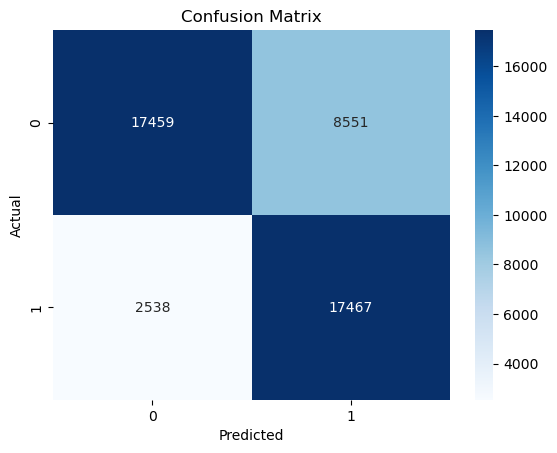

In [79]:
# Creating Confusion Metrics

knmo = confusion_matrix(y_test_os, knyo_pred)

# Visualizing the confusion metrics
sns.heatmap(knmo, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show();

True Negatives (TN): This represents the number of correctly predicted instances of the negative class (actual negative, predicted negative). In this case, there are 17,405 instances correctly predicted as negative.

False Positives (FP): This represents the number of instances incorrectly predicted as positive when they are actually negative (actual negative, predicted positive). In this case, there are 8,605 instances incorrectly predicted as positive when they are actually negative.


False Negatives (FN): This represents the number of instances incorrectly predicted as negative when they are actually positive (actual positive, predicted negative). In this case, there are 2,509 instances incorrectly predicted as negative when they are actually positive.


True Positives (TP): This represents the number of correctly predicted instances of the positive class (actual positive, predicted positive). In this case, there are 17,496 instances correctly predicted as positive.

### SMOTE

In [80]:
from imblearn.over_sampling import SMOTE

In [81]:
sm = SMOTE(sampling_strategy='minority', random_state=2)
X_sm, y_sm = sm.fit_resample(X, y.ravel())
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_sm)))

The number of classes before fit Counter({0: 86986, 1: 11066})
The number of classes after fit Counter({0: 86986, 1: 86986})


### TRAIN-TEST-SPLIT

In [82]:
X_train_sm,X_test_sm,y_train_sm,y_test_sm=train_test_split(X_sm, y_sm,train_size=0.7,random_state=42)

print(X_train_sm.shape)
print(X_test_sm.shape)
print(y_train_sm.shape)
print(y_test_sm.shape)

(121780, 43)
(52192, 43)
(121780,)
(52192,)


In [83]:
# Logistic Regression Algorithm with SMOTE

lrs = LogisticRegression() #initialization

lrs.fit(X_train_sm, y_train_sm)

lys_pred = lrs.predict(X_test_sm)

# Evaluation Metrics
print('Logistic Regression')
print('Accuracy:', accuracy_score(y_test_sm, lys_pred))
print('Precision:',precision_score(y_test_sm, lys_pred))
print('Recall:', recall_score(y_test_sm, lys_pred))
print('F1 Score:', f1_score(y_test_sm, lys_pred))
print('AUC_ROC:', roc_auc_score(y_test_sm, lys_pred))

Logistic Regression
Accuracy: 0.6501762722256285
Precision: 0.6548229309332811
Recall: 0.639410034007107
F1 Score: 0.647024707110544
AUC_ROC: 0.650207303618211


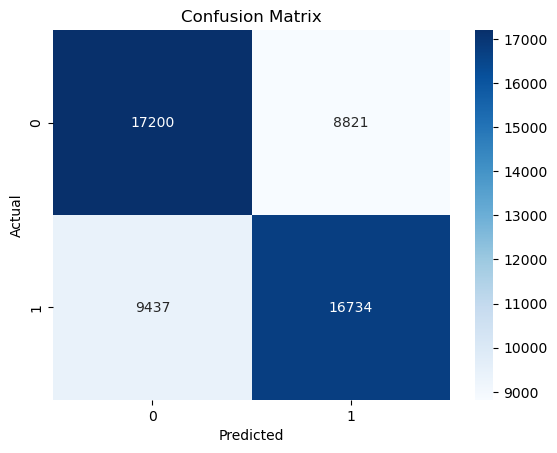

In [84]:
# Creating Confusion Metrics

lysm = confusion_matrix(y_test_sm, lys_pred)

# Visualizing the confusion metrics
sns.heatmap(lysm, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show();

True Negatives (TN): This represents the number of correctly predicted instances of the negative class (actual negative, predicted negative). In this case, there are 17,200 instances correctly predicted as negative.

False Positives (FP): This represents the number of instances incorrectly predicted as positive when they are actually negative (actual negative, predicted positive). In this case, there are 8,821 instances incorrectly predicted as positive when they are actually negative.


False Negatives (FN): This represents the number of instances incorrectly predicted as negative when they are actually positive (actual positive, predicted negative). In this case, there are 9,437 instances incorrectly predicted as negative when they are actually positive.


True Positives (TP): This represents the number of correctly predicted instances of the positive class (actual positive, predicted positive). In this case, there are 16,734 instances correctly predicted as positive.

In [85]:
#Random Forest Classifier/ Algorithm with SMOTE

rfcs = RandomForestClassifier() #initialization

rfcs.fit(X_train_sm, y_train_sm)

rfys_pred = rfcs.predict(X_test_sm)

# Evaluation Metrics
print('Random Forest')
print('Accuracy:', accuracy_score(y_test_sm, rfys_pred))
print('Precision:',precision_score(y_test_sm, rfys_pred))
print('Recall:', recall_score(y_test_sm, rfys_pred))
print('F1 Score:', f1_score(y_test_sm, rfys_pred))
print('AUC_ROC:', roc_auc_score(y_test_sm, rfys_pred))

Random Forest
Accuracy: 0.9013258736971184
Precision: 0.940599455040872
Recall: 0.857361201329716
F1 Score: 0.8970535321632751
AUC_ROC: 0.9014525925175924


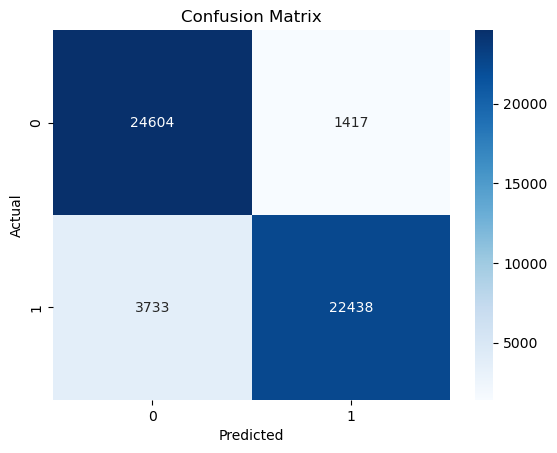

In [86]:
# Creating Confusion Metrics

rfsm = confusion_matrix(y_test_sm, rfys_pred)

# Visualizing the confusion metrics
sns.heatmap(rfsm, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show();

True Negatives (TN): This represents the number of correctly predicted instances of the negative class (actual negative, predicted negative). In this case, there are 24,613 instances correctly predicted as negative.

False Positives (FP): This represents the number of instances incorrectly predicted as positive when they are actually negative (actual negative, predicted positive). In this case, there are 1,408 instances incorrectly predicted as positive when they are actually negative.


False Negatives (FN): This represents the number of instances incorrectly predicted as negative when they are actually positive (actual positive, predicted negative). In this case, there are 3,712 instances incorrectly predicted as negative when they are actually positive.


True Positives (TP): This represents the number of correctly predicted instances of the positive class (actual positive, predicted positive). In this case, there are 22,459 instances correctly predicted as positive.

In [87]:
#XGBoost Classifier/ Algorithm with SMOTE

clfs = xgb.XGBClassifier()
clfs.fit(X_train_sm, y_train_sm)

clys_pred = clfs.predict(X_test_sm)

# Evaluation Metrics
print('Random Forest')
print('Accuracy:', accuracy_score(y_test_sm, clys_pred))
print('Precision:',precision_score(y_test_sm, clys_pred))
print('Recall:', recall_score(y_test_sm, clys_pred))
print('F1 Score:', f1_score(y_test_sm, clys_pred))
print('AUC_ROC:', roc_auc_score(y_test_sm, clys_pred))

Random Forest
Accuracy: 0.8806713672593501
Precision: 0.9268073449471387
Recall: 0.8273661686599671
F1 Score: 0.8742681794323092
AUC_ROC: 0.8808250081607356


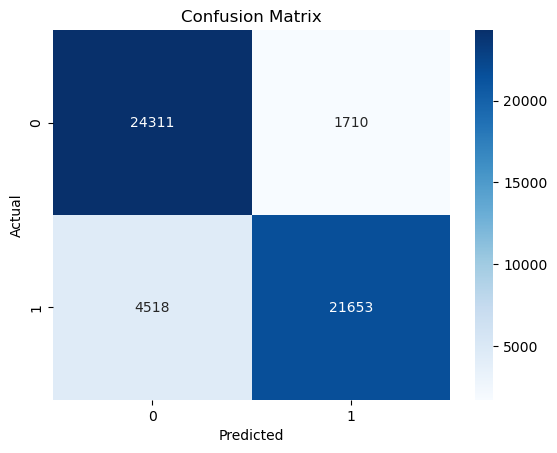

In [88]:
# Creating Confusion Metrics

clysm = confusion_matrix(y_test_sm, clys_pred)

# Visualizing the confusion metrics
sns.heatmap(clysm, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show();

True Negatives (TN): This represents the number of correctly predicted instances of the negative class (actual negative, predicted negative). In this case, there are 24,311 instances correctly predicted as negative.

False Positives (FP): This represents the number of instances incorrectly predicted as positive when they are actually negative (actual negative, predicted positive). In this case, there are 1,710 instances incorrectly predicted as positive when they are actually negative.


False Negatives (FN): This represents the number of instances incorrectly predicted as negative when they are actually positive (actual positive, predicted negative). In this case, there are 4,518 instances incorrectly predicted as negative when they are actually positive.


True Positives (TP): This represents the number of correctly predicted instances of the positive class (actual positive, predicted positive). In this case, there are 21,653 instances correctly predicted as positive.

In [115]:
import pickle

# Save the trained model

with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rfco, file)

In [116]:
X_test_os.head(10)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
104664,2,0,6,3,2,5,1,18,53,0,13,0,0,0,494,135,528,9,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,1
10723,2,1,6,2,2,1,8,18,54,0,13,0,0,2,693,78,256,6,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,1,1
114518,2,0,5,2,0,1,7,71,65,3,19,0,3,0,113,239,325,9,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,0,1
5588,2,0,8,1,0,7,3,11,43,0,13,0,0,0,276,237,135,7,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,1
92492,2,0,8,1,0,7,2,11,78,1,14,0,0,0,276,384,325,9,1,1,1,1,2,0,1,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,1
36667,2,1,7,2,0,7,1,11,36,0,12,0,0,0,693,316,152,6,2,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,1
87712,2,1,5,2,0,7,5,8,76,3,18,0,1,0,276,256,267,9,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,0,1
124215,2,0,5,1,0,7,4,18,64,0,17,0,1,1,143,395,148,8,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,1,1
32248,2,1,7,5,1,17,3,28,7,2,29,0,0,0,500,316,155,9,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,0
51530,2,0,4,1,0,7,2,18,58,0,17,0,0,1,283,395,532,8,2,1,2,1,1,0,1,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,0,1


In [117]:
# Load the saved model

with open('random_forest_model.pkl', 'rb') as file:
    rf_model = pickle.load(file)

In [118]:
rf_model.predict([[2,1,7,1,1,2,10,18,54,3,29,0,0,2,398,141,143,9,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1]])

array([1])

In [119]:
rf_model.score(X_test_os,y_test_os)

0.9345213517331306